In [ ]:
!pip install gdown

In [ ]:
!gdown 1sIlfXEQz9YUc7MAb37whC3PkaFCWjQTK

Downloading...
From (original): https://drive.google.com/uc?id=1sIlfXEQz9YUc7MAb37whC3PkaFCWjQTK
From (redirected): https://drive.google.com/uc?id=1sIlfXEQz9YUc7MAb37whC3PkaFCWjQTK&confirm=t&uuid=170de6d3-9f83-493d-a265-1ce5ef091f3d
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 43.0MB/s]


In [ ]:
!unzip "Copy of Copy of devnagari digit.zip"


Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

Task 1: Data Preparation
Loading the Data
• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

Class map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Class map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Unique y_train labels: [0 1 2 3 4 5 6 7 8 9]
Training set:(17000, 28, 28, 1),Labels:(17000, 10)
Testing set:(3000, 28, 28, 1),Labels:(3000, 10)


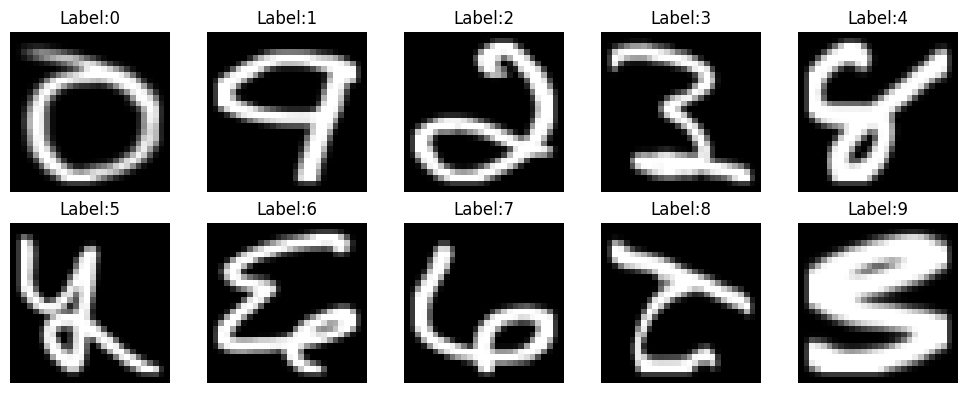

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

# Define dataset paths
train_dir="/content/DevanagariHandwrittenDigitDataset/Train"
test_dir="/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height,img_width=28,28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images=[]
    labels=[]

    # Filter only digit_x folders (avoid .DS_Store etc.)
    class_names=sorted([
        name for name in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, name)) and name.startswith("digit_")
    ])

    class_map={name: i for i, name in enumerate(class_names)}
    print("Class map:", class_map)

    for class_name in class_names:
        class_path=os.path.join(folder,class_name)
        label=class_map[class_name]
        for filename in os.listdir(class_path):
            if filename.endswith(".png"):
                img_path=os.path.join(class_path, filename)
                img=Image.open(img_path).convert("L")  # Grayscale
                img=img.resize((img_width, img_height))
                img=np.array(img)/255.0
                images.append(img)
                labels.append(label)

    return np.array(images),np.array(labels)

# Load datasets
x_train,y_train=load_images_from_folder(train_dir)
x_test,y_test=load_images_from_folder(test_dir)

# Confirm label range is valid (0–9)
print("Unique y_train labels:",np.unique(y_train))

# Reshape for Keras input
x_train=x_train.reshape(-1,img_height,img_width,1)
x_test=x_test.reshape(-1,img_height,img_width,1)

# One-hot encode
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

# Print shapes
print(f"Training set:{x_train.shape},Labels:{y_train.shape}")
print(f"Testing set:{x_test.shape},Labels:{y_test.shape}")

# Visualize a few training samples
plt.figure(figsize=(10,4))
shown_labels=set()
shown_count=0

for i in range(len(x_train)):
    label=np.argmax(y_train[i])
    if label not in shown_labels:
        plt.subplot(2,5,shown_count+1)
        plt.imshow(x_train[i].reshape(28,28),cmap='gray')
        plt.title(f"Label:{label}")
        plt.axis("off")
        shown_labels.add(label)
        shown_count+=1
    if shown_count==10:
        break

plt.tight_layout()
plt.show()

Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

- 1st hidden layer: 64 neurons

- 2nd hidden layer: 128 neurons

- 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model=Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64,activation='sigmoid'),
    Dense(128,activation='sigmoid'),
    Dense(256,activation='sigmoid'),
    Dense(10,activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),and evaluation metric (e.g., accuracy).

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Task 4: Train the Model

Model Training

• Use the model. fit) function to train the model. Set the batch size to 128 and the number of epochs to 20.

• Use validation split (validation split=0.2) to monitor the model's performance on validation data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks=[
     ModelCheckpoint("best_model.h5",save_best_only=True),
     EarlyStopping(monitor="val_loss",patience=4)
]
history=model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
 97/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2796 - loss: 1.9844

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2992 - loss: 1.9477 - val_accuracy: 0.0000e+00 - val_loss: 7.5547
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7917 - loss: 0.6447 - val_accuracy: 0.0000e+00 - val_loss: 8.7490
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8860 - loss: 0.3372 - val_accuracy: 0.0000e+00 - val_loss: 9.6305
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9315 - loss: 0.2320 - val_accuracy: 0.0000e+00 - val_loss: 10.0855
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9480 - loss: 0.1704 - val_accuracy: 0.0000e+00 - val_loss: 10.2264


Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model. evaluate() on the test set to check the test accuracy and loss.

In [ ]:
#Evaluate on test data
test_loss,test_acc=model.evaluate(x_test, y_test,verbose=2)
print(f"\nTest Accuracy:{test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7603 - loss: 2.1644

Test Accuracy:0.7603


Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model. save ().

• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
# Save model
model.save('devnagari_fcn_model.h5')

# Load model
from tensorflow.keras.models import load_model
loaded_model=load_model('devnagari_fcn_model.h5')

# Re-evaluate
loss,acc=loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"\nLoaded Model Accuracy:{acc:.4f}")

94/94 - 1s - 5ms/step - accuracy: 0.7603 - loss: 2.1644

Loaded Model Accuracy:0.7603


Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model's predicted probabilities to digit labels using np. argmax ().


Expected Deliverables

• Code Implementation: Complete code for building, training, evaluating, saving, and loading the model.

• Visualization: Graphs showing the training and validation loss and accuracy.

• Test Accuracy: Display the final test accuracy.

• Saved Model: Submit the saved . h5 model file.

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


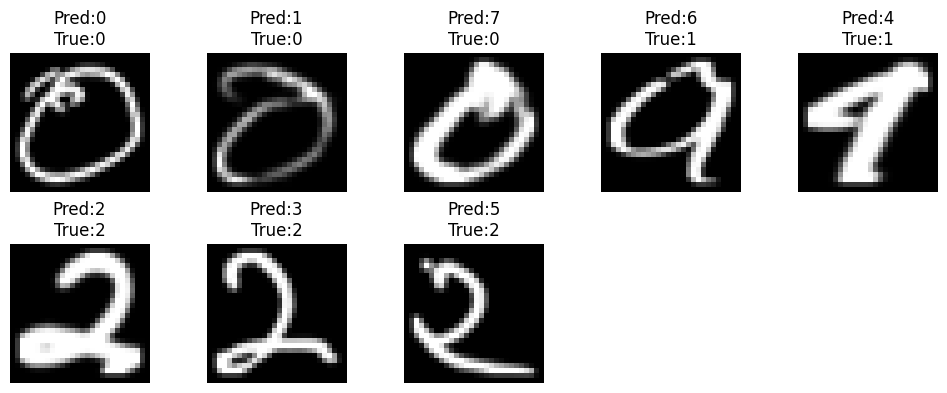

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
predictions=loaded_model.predict(x_test)
predicted_labels=np.argmax(predictions, axis=1)
true_labels=np.argmax(y_test, axis=1)
# Show sample predictions (1 per class)
shown_labels=set()
plt.figure(figsize=(10,4))
shown_count=0
for i in range(len(x_test)):
      pred=predicted_labels[i]
      true=true_labels[i]
      if pred not in shown_labels:
        plt.subplot(2,5,shown_count+1)
        plt.imshow(x_test[i].reshape(28,28),cmap='gray')
        plt.title(f"Pred:{pred}\nTrue:{true}")
        plt.axis("off")
        shown_labels.add(pred)
        shown_count+=1
      if shown_count==10:
        break
plt.tight_layout()
plt.show()